# Ewald Sphere

Play with the Ewald Sphere

This schematics represent the Ewald sphere for a typical high tension of 200 kV and a 1D crystal with lattice parameter 2.5 Angstrom where 100 is a forbiden reflexion, hence the first reflexion is 200. 

The sample and the beam can be tilted between -40 and +40 miliradians

With those (very typical) numbers, the skech is hard to interpret as the angles are small and the reciprocal latice parameter small compared to the wave vector. 

Therefore, the schematics is usualy done in an exagerated way. This can be modelized with the "scaling" parameter. With this parameter, the wave vector is divided by scaling and the beam tilt and sample tilt are multiplied by scaling (in order to keep the represantation of the same diffraction conditions, i.e. a 2 beam case remains a 2-beam case.

You can try to set up a 2-beam case in Bright field (beam tilt =0) by tilting the specimen, and then find the right beam tilt for the dark field condition 

In [1]:
import numpy as np

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [2]:
# universal constants
h=6.626*10**(-34) #plank's constant J.s
me=9.109*10**(-31) #electron's mass kg (m_0)
mecsquared=511 # electron's rest mass in keV (m_0*c^2)
electron=1.602*10**(-19)# electron's charge

In [3]:
#electron's wavelength in nm for an acceleration voltage  in kV  (relativistic)
def lamb(Voltage):
    l=10**9*h/np.sqrt(2*me*Voltage*1000*electron)*(1+Voltage/(2*mecsquared))**(-0.5)
    return l

In [4]:
def k(E,scale):
    k = 1/(lamb(E)*scale)
    return k

In [5]:
# Crystal lattice parameter a
# as an example 001 orientation fcc first G is 200 (very typical case)
# We use -2G, -G, 0 G & 2G, 5 beams

Gs = np.array([-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0 ])
a = 0.25 # 0.25nm
recip_x = (2/a)*Gs


In [6]:
# incident wave vector end point depends on scale, E and theta_beam
def ki_endx(E,scale,tilt):
    ki_endx = k(E,scale)*np.sin(scale*tilt*10**(-3))
    return ki_endx

def ki_endy(E,scale,tilt):
    ki_endy = -k(E,scale)*np.cos(scale*tilt*10**(-3))
    return ki_endy

def kix(E,scale,tilt):
    kix = np.array([0,ki_endx(E,scale,tilt)])
    return kix

def kiy(E,scale,tilt):
    kiy = np.array([0,ki_endy(E,scale,tilt)])
    return kiy


In [7]:
def Ewald_angles(scale,tilt):
    ewa = np.linspace(np.pi + ((scale*tilt+400)*10**(-3)),2*np.pi + (scale*tilt-400)*10**(-3),2000)
    return ewa

## First interactive figure: diffraction condition

In [55]:
E = 200
scale = 10
beam_tilt = 20
sample_tilt = 20
es = figure(title="Ewald Sphere.  Beam changes the beam tilt in mrad; sample changes the sample tilt im mrad. 10mrad = 0.57 degree", plot_height=400, plot_width=800,match_aspect=True)
l0 = es.line([0,0],[k(E,scale)/10,-1.2*k(E,scale)], line_width=1,color="black")
l1 = es.line(k(E,scale)*np.cos(Ewald_angles(scale,beam_tilt)),k(E,scale)*np.sin(Ewald_angles(scale,beam_tilt)),legend_label="Ewald Sphere", line_width=2.5)
l2 = es.line(kix(E,scale,beam_tilt),kiy(E,scale,beam_tilt),legend_label="incident beam", line_width=2.5,color="red")
p3 = es.circle(recip_x*np.cos(sample_tilt*10**(-3)) + ki_endx(E,scale,beam_tilt) ,
               recip_x*np.sin(sample_tilt*10**(-3)) + ki_endy(E,scale,beam_tilt) ,
               legend_label="reciprocal lattice", line_width=3.5,color="green")

es.legend.location = "bottom_left"
#show(es)


def update(scale = 1, beam_tilt = 20, sample_tilt = 20 ):
    l2.data_source.data['x']=kix(E,scale,beam_tilt)
    l2.data_source.data['y']=kiy(E,scale,beam_tilt)
    l1.data_source.data['x']=k(E,scale)*np.cos(Ewald_angles(scale,beam_tilt))
    l1.data_source.data['y']=k(E,scale)*np.sin(Ewald_angles(scale,beam_tilt))
    l0.data_source.data['y']=[k(E,scale)/10,-1.2*k(E,scale)]
    p3.data_source.data['x']=recip_x*np.cos(scale*sample_tilt*10**(-3)) + ki_endx(E,scale,beam_tilt)
    p3.data_source.data['y']=recip_x*np.sin(scale*sample_tilt*10**(-3)) + ki_endy(E,scale,beam_tilt)
   
    
#    l2.data_source.data['y']=eps2(omegap,gamma,omegas)
#    l3.data_source.data['y']=lossfunction(omegap,gamma,omegas)
    push_notebook()
    
es.legend.click_policy="hide"    
show(es, notebook_handle=True)

interact(update, \
         scale=widgets.IntSlider(min=1,max=10,value=1,description="scale"), \
        beam_tilt=widgets.IntSlider(min=-40,max=40,value=0,description="Beam"), \
       sample_tilt=widgets.IntSlider(min=-40,max=40,value=0,description="sample"));



interactive(children=(IntSlider(value=1, description='scale', max=10, min=1), IntSlider(value=0, description='…

## Second interactive figure: first order Laue zone

In [9]:
E = 200
scale = 1
beam_tilt = 0
sample_tilt = 0
es = figure(title="Ewald Sphere.  Beam changes the beam tilt in mrad; sample changes the sample tilt im mrad. 10mrad = 0.57 degree", plot_height=400, plot_width=800,match_aspect=True)
l0 = es.line([0,0],[k(E,scale)/10,-1.2*k(E,scale)], line_width=1,color="black")
l1 = es.line(k(E,scale)*np.cos(Ewald_angles(scale,beam_tilt)),k(E,scale)*np.sin(Ewald_angles(scale,beam_tilt)),legend_label="Ewald Sphere", line_width=2.5)
l2 = es.line(kix(E,scale,beam_tilt),kiy(E,scale,beam_tilt),legend_label="incident beam", line_width=2.5,color="red")
p3 = es.circle(recip_x*np.cos(scale*sample_tilt*10**(-3)) + ki_endx(E,scale,beam_tilt) ,
               recip_x*np.sin(scale*sample_tilt*10**(-3)) + ki_endy(E,scale,beam_tilt) ,
               legend_label="ZOLZ", line_width=3.5,color="green")
p4 = es.circle(recip_x*np.cos(scale*sample_tilt*10**(-3)) + ki_endx(E,scale,beam_tilt) - 2/a*np.sin(scale*sample_tilt*10**(-3)) ,
               recip_x*np.sin(scale*sample_tilt*10**(-3)) + ki_endy(E,scale,beam_tilt) + 2/a*np.cos(scale*sample_tilt*10**(-3)),
               legend_label="FOLZ", line_width=1.5,color="black")

es.legend.location = "bottom_left"
#show(es)


def update(scale = 1, beam_tilt = 20, sample_tilt = 20 ):
    l2.data_source.data['x']=kix(E,scale,beam_tilt)
    l2.data_source.data['y']=kiy(E,scale,beam_tilt)
    l1.data_source.data['x']=k(E,scale)*np.cos(Ewald_angles(scale,beam_tilt))
    l1.data_source.data['y']=k(E,scale)*np.sin(Ewald_angles(scale,beam_tilt))
    l0.data_source.data['y']=[k(E,scale)/10,-1.2*k(E,scale)]
    p3.data_source.data['x']=recip_x*np.cos(scale*sample_tilt*10**(-3)) + ki_endx(E,scale,beam_tilt)
    p3.data_source.data['y']=recip_x*np.sin(scale*sample_tilt*10**(-3)) + ki_endy(E,scale,beam_tilt)
    p4.data_source.data['x']=recip_x*np.cos(scale*sample_tilt*10**(-3)) + ki_endx(E,scale,beam_tilt) - 2/a*np.sin(scale*sample_tilt*10**(-3))
    p4.data_source.data['y']=recip_x*np.sin(scale*sample_tilt*10**(-3)) + ki_endy(E,scale,beam_tilt) + 2/a*np.cos(scale*sample_tilt*10**(-3))
   
    
#    l2.data_source.data['y']=eps2(omegap,gamma,omegas)
#    l3.data_source.data['y']=lossfunction(omegap,gamma,omegas)
    push_notebook()
    
es.legend.click_policy="hide"    
show(es, notebook_handle=True)

interact(update, \
         scale=widgets.IntSlider(min=1,max=10,value=1,description="scale"), \
        beam_tilt=widgets.IntSlider(min=-40,max=40,value=0,description="Beam"), \
       sample_tilt=widgets.IntSlider(min=-40,max=40,value=0,description="sample"));


interactive(children=(IntSlider(value=1, description='scale', max=10, min=1), IntSlider(value=0, description='…

## Excitation error in 2-beam condition

In This part we will investigate the effect of excitation error and sample thickness on the intensity of the diffraction spots.

We stick to the case of a crystal with lattice parameter a=2.5 Angstrom, first non forbidden G is 200.

We will concentrate on the central beam (000) and $G_{200}$ which is the first diffracted beam  and consider a 2-beam condidtion.

We first need the Bragg angle (in radians) for $G_{200}$. 
$$d_{200}=a/2$$. 
$$\theta_B(E)=\frac{\lambda}{2 d_{hkl}} = \frac{\lambda}{2 d_{200}}  = \frac{\lambda(E)}{a}$$

Then we have to tilt the sample by $\theta_B$ to reach a 2-beam condition.

Moreover, we fix the energy of the electron beam at 200 keV. 

All angles are in miliradians!

In [10]:
#Bragg angle for the 200 spot as a function of energy in miliradians
def thetaB(E):
    tB = 1000* lamb(E)/a
    return tB

If we tilt away from  exact Bragg conditions by $\Delta \theta$, we get the excitation error or deviation parameter $s$:
    $$s=\frac{\Delta \theta}{d_{200}} = \frac{2 \Delta \theta}{a}$$
    
   $$\Delta\theta = \frac{s a}{2}$$

In [11]:
def Delta_theta(s): # in milliradians
    delthe = 1000 * s *a /2
    return delthe

The extinction distance, $\xi_g$ is given for a specific G. It depends on the scattering properties of the specimen (atomic number) but also on the considered scattering angle (G), and the energy of the electrons. It can range between 10 to some 100 of nm, and a simulation software like JEMS will calculate it. 

In our demonstration, we will not make any attempt to calculate it, and we will take it as a variable parameter, but keep in mind that it it is a material + TEM (energy) related parameter!

With the excitation error and extinction distance, we can calculate the intensity seen in the diffracted spot G

$$I_g(t)=\frac{1}{1+\xi_g^2s^2}\sin^2\left[\pi t \sqrt{\frac{1}{\xi_g^2}+s^2}\right]$$

In [12]:
def I_G(xiG,s,t):
    ig1 = np.sqrt(s**2 +1/xiG**2)
    ig2 =  np.pi * t * ig1
    ig3 = (np.sin(ig2))**2
    ig4 = 1/(1+ xiG**2 * s**2) * ig3
    return ig4

$I_g$ can be plotted as a function of $\Delta\theta$ or $s$. Here we chose to plot it as function of $s$. You can see how it changes when you adjust extinction length and sample thickness.

In [60]:
# IG can be plotted as a function of delta theta or s here we plot it as a function of s 
dT = np.linspace(-10*thetaB(E),10*thetaB(E),10000)
ds = 2  * dT / (1000 * a)


xiG = 50
t = 100

f = figure(title="Intensity seen in the 200 diffraction spot.", plot_height=400, plot_width=800)
l0 = f.line(ds,I_G(xiG,ds,t), line_width=2.5,color="orange")

f.xaxis.axis_label = 'excitation error s (1/nm)'
f.yaxis.axis_label = 'Relative intensity. '


#f.legend.location = "bottom_left"
#show(f)

def update3(xiG = 50, thickness = 25):
    l0.data_source.data['y'] = I_G(xiG,ds,thickness)
   
    push_notebook()
    
#es.legend.click_policy="hide"    
show(f, notebook_handle=True)

interact(update3, \
         xiG = widgets.IntSlider(min=10,max=200,value=50,description="xiG"), \
       thickness = widgets.IntSlider(min = 1 , max = 220 ,value = 100,description="thickness"));


interactive(children=(IntSlider(value=50, description='xiG', max=200, min=10), IntSlider(value=100, descriptio…

## In the next plot, we combine this curve with the Ewald Sphere

We need to rotate the representation of the diffracted beam intensity. The rotation is not strightforward, there is the beam tilt plus an additional angle $\alpha$ linked to the fact that we point towards G. Triangles are not rectangular, and if we want to be able to do a scaled representation for better visibility, small angles approximation isn't an option...

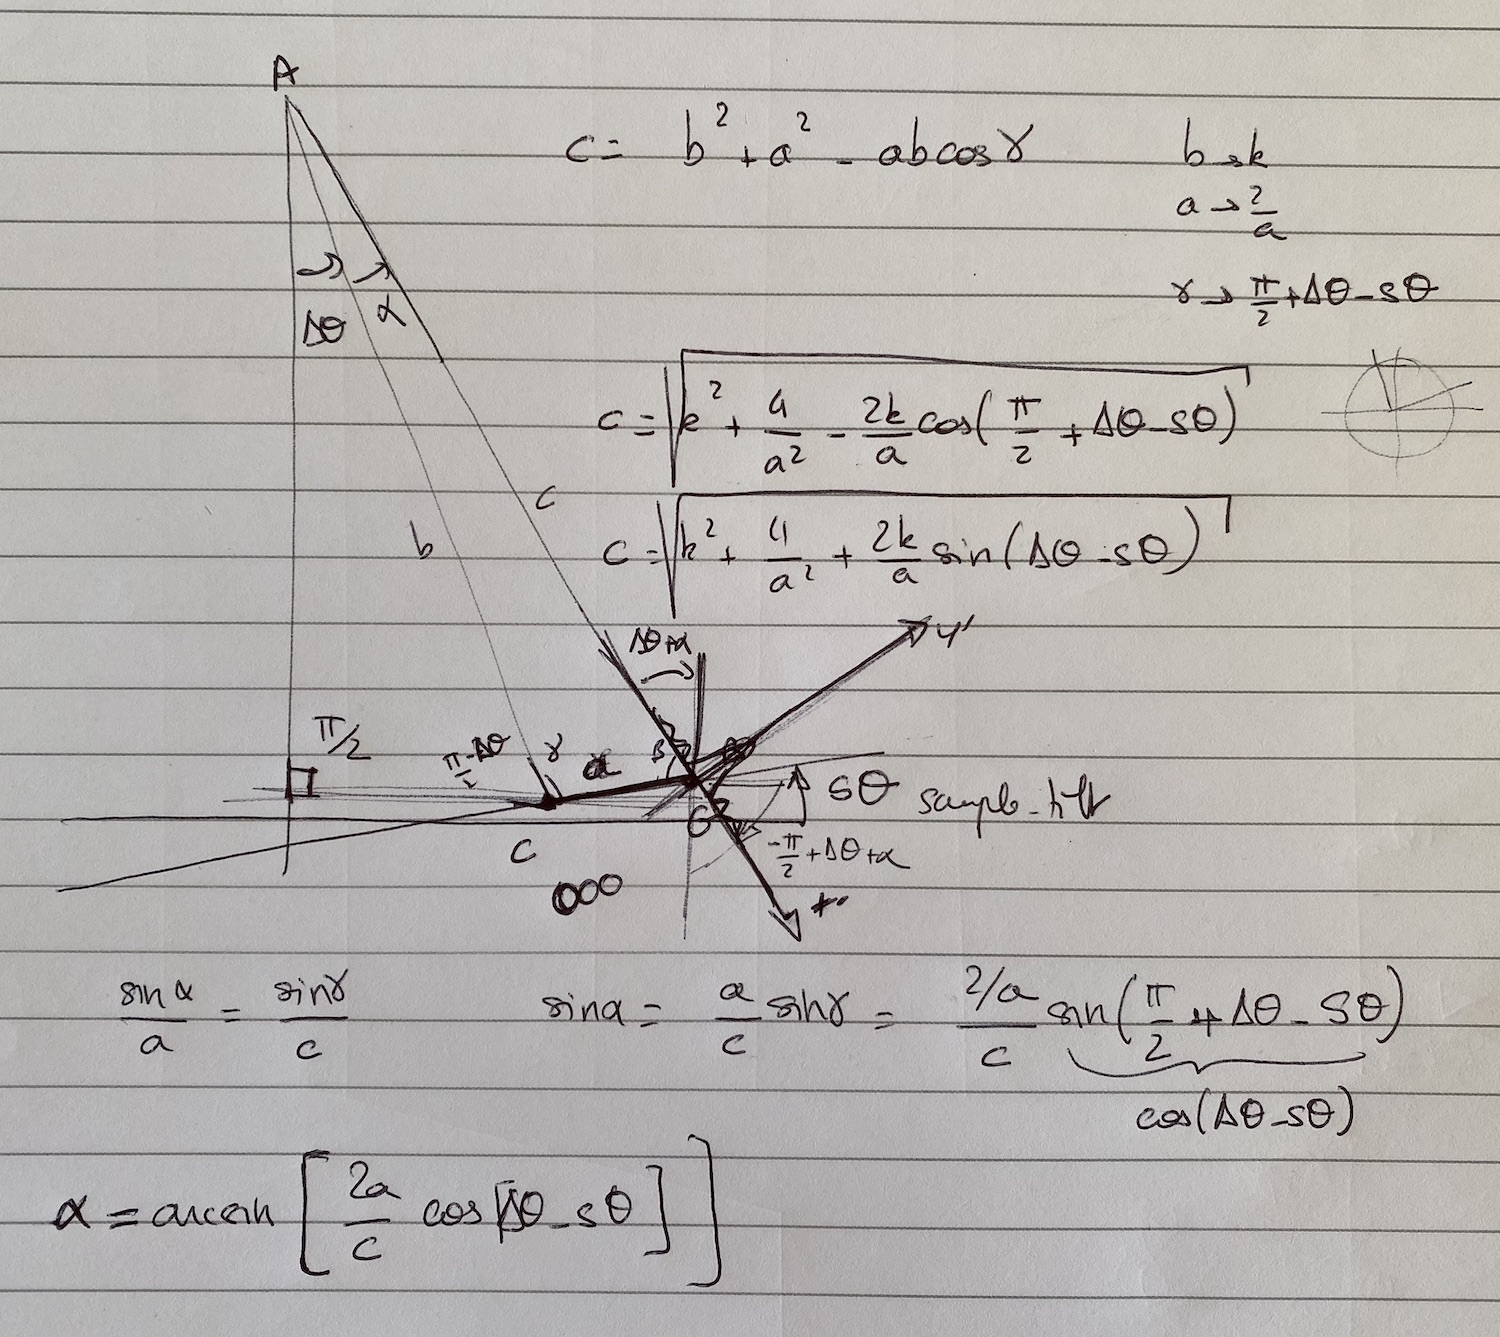

In [64]:
from IPython.display import Image
Image("Ewald_1.jpg")

In [62]:
# rot takes sample tilt in mrad but returns an angle in radians
def rot(ee,sample_tilt,E,scale): # Rotation for the representation of IG in Ewald Sphere
    c = np.sqrt (k(E,scale))**2 + 4/a**2 + ((2/a)*k(E,scale)*np.sin(Delta_theta(ee)/1000-sample_tilt/1000) ) 
    co = np.cos(Delta_theta(ee)/1000 - sample_tilt/1000)            
    alph = np.arcsin ( 2 * co /(a*c)) 
    rot = - np.pi/2 + (0.001 * Delta_theta(ee) + alph)
    return rot
    
# CAUTION !! We have 2 occurence of the excitation error ! 
# ee is the excitation error defined by operator and linked to Delta_theta
# s is the variable used to plot the curve of Ig !

def Xrot(ee,sample_tilt,E,scale,xiG,s,t):
    xrot = np.cos(rot(ee,sample_tilt,E,scale)) * s - np.sin(rot(ee,sample_tilt,E,scale))*1*I_G(xiG,s,t) 
    return xrot

def Yrot(ee,sample_tilt,E,scale,xiG,s,t):
    xrot = np.sin(rot(ee,sample_tilt,E,scale)) * s + np.cos(rot(ee,sample_tilt,E,scale))*1*I_G(xiG,s,t) 
    return xrot

In [63]:
E = 200
scale = 1 # not yet implemented in this graph, so keep it to one
ee = 0.05
sample_tilt = thetaB(E)
beam_tilt = Delta_theta(ee)



xiG = 10
t = 5



es3 = figure(title="Ewald Sphere", plot_height=600, plot_width=800,match_aspect=True)
l0 = es3.line([0,0],[k(E,scale)/10,-1.2*k(E,scale)], line_width=1,color="black")

l1 = es3.line(k(E,scale)*np.cos(Ewald_angles(scale,beam_tilt)),k(E,scale)*np.sin(Ewald_angles(scale,beam_tilt)),
             legend_label="Ewald Sphere", line_width=2.5)

l2 = es3.line(kix(E,scale,Delta_theta(ee)),kiy(E,scale,Delta_theta(ee)),
             legend_label="incident beam", line_width=2.5,color="red")

l3 = es3.line([0,ki_endx(E,scale,Delta_theta(ee)) + 2/a*np.cos(sample_tilt/1000)],
             [0,ki_endy(E,scale,Delta_theta(ee)) + 2/a*np.sin(sample_tilt/1000)],
             legend_label="diffracted beam", line_width=2.5,color='#fee090')

l4 = es3.line(Xrot(ee,sample_tilt,E,scale,xiG,ds,t) + ki_endx(E,scale,Delta_theta(ee)) + 2/a*np.cos(sample_tilt/1000),
             Yrot(ee,sample_tilt,E,scale,xiG,ds,t) + ki_endy(E,scale,Delta_theta(ee)) + 2/a*np.sin(sample_tilt/1000),
             line_width=2.5,color="orange") #Ig curve rotated and positionned

p3 = es3.circle(recip_x*np.cos(scale*sample_tilt*10**(-3)) + ki_endx(E,scale,Delta_theta(ee)) ,
               recip_x*np.sin(scale*sample_tilt*10**(-3)) + ki_endy(E,scale,Delta_theta(ee)) ,
               legend_label="reciprocal lattice", line_width=3.5,color="green")

es3.legend.location = "bottom_left"
#show(es)

def update4(xiG = 10, t = 5, ee = 0.05):
    l2.data_source.data['x'] = kix(E,scale,Delta_theta(ee))
    l2.data_source.data['y'] = kiy(E,scale,Delta_theta(ee))
    l3.data_source.data['x'] = [0,ki_endx(E,scale,Delta_theta(ee)) + 2/a*np.cos(sample_tilt/1000)]
    l3.data_source.data['y'] = [0,ki_endy(E,scale,Delta_theta(ee)) + 2/a*np.sin(sample_tilt/1000)]
    l4.data_source.data['x'] = Xrot(ee,sample_tilt,E,scale,xiG,ds,t) + ki_endx(E,scale,Delta_theta(ee)) + 2/a*np.cos(sample_tilt/1000)
    l4.data_source.data['y'] = Yrot(ee,sample_tilt,E,scale,xiG,ds,t) + ki_endy(E,scale,Delta_theta(ee)) + 2/a*np.sin(sample_tilt/1000)
    p3.data_source.data['x'] = recip_x*np.cos(scale*sample_tilt*10**(-3)) + ki_endx(E,scale,Delta_theta(ee))
    p3.data_source.data['y'] = recip_x*np.sin(scale*sample_tilt*10**(-3)) + ki_endy(E,scale,Delta_theta(ee)) 
    push_notebook()

   
#es.legend.click_policy="hide"    
show(es3, notebook_handle=True)

interact(update4, \
         xiG = widgets.IntSlider(min=10,max=200,value=10,description="xiG"), \
       t = widgets.IntSlider(min = 1 , max = 220 ,value = 5,description="thickness"),\
        ee = widgets.FloatSlider(min=-1.,max=1.,value=0.0,description="ee"));



interactive(children=(IntSlider(value=10, description='xiG', max=200, min=10), IntSlider(value=5, description=…

In the previous representations of the Ewald sphere in this notebook, we used the center of the sphere as the origin of the reference system. This is the most straightforward definition. When doing this the diffraction pattern is moving when the beam is tited as the central beam is attached to the end of the incident beam. This is indeet what is observed in the TEM. However for representing the diffraction conditions, sketches in books usually fixe the central spot  $G=000$, as the center of the reference frame. By doing this, the center of the Ewald sphere moves around when the beam is tilted. 